# Fitting data to AA

Fitting a simple hyperbolic function worked before

In [2]:
from scipy.optimize import minimize
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

def set_mpl_params_meeting(matplotlib):
    plt.figure(figsize=(6,4), dpi=100)
    # formatting plots
    font = {'family' : 'monospace', 'size'   : 10, 'sans-serif':'Nimbus'}
    lines = {"linewidth": 2}

    matplotlib.rc('font', **font)
    matplotlib.rc('lines', **lines)

def scipy_fit(fn, train_sizes, mean):
    def fx(args):
        x = np.array(train_sizes)
        predict = fn(x, *args)
        true = mean
        error = np.mean((predict - mean)**2)
        return error
    params = minimize(fx, (0.7, 2, 0.55))
    return params

def get_y(fn, params, x):
    return fn(x, *params)

#plot the predicted and true values
def plot_fit_and_true(y_predict, y_true, x):
    set_mpl_params_meeting(matplotlib)
    plt.plot(x, y_true, color="tab:green")
    plt.scatter(x, y_true, color="tab:green", label="true")

    plt.plot(x, y_predict, color="tab:orange")
    plt.scatter(x, y_predict, color="tab:orange", label="predicted")
    
    plt.grid()
    plt.legend()
    

def fit_data(df_a, fn):
    fit = scipy_fit(fn, df_a.train_size//1000, df_a.mean_vals)
    fit_params = fit.x
    return fit_params

def compute_rmse(pred, true):
    return np.mean((pred-true)**2)

def fit_data_and_check(fn, path_to_csv):
    df = pd.read_csv(path_to_csv)
    x = df.train_size//1000
    y = df.mean_vals
    
    fit_obj = scipy_fit(fn, x, y)
    fit_params = fit_obj.x
    
    y_pred = get_y(fn, fit_params, x)
    
    # compute errors for quantitative check
    rmse = compute_rmse(y_pred, y)
    r2   = np.corrcoef(y_pred, y)
    print(f"rmse : {rmse},\nr2 :\n {r2}")
    
    # plot the fit and true data for visual checks
    plot_fit_and_true(y_pred, y, x)
    
    return y_pred, fit_params, x, y

# functions to fit
fn = lambda x,a,b,c: -a + c/x**b # hyperbolic function being fit to data 
fn_inv = lambda y,a,b,c: (c/(y+a))**(1/b)

def compute_datasavings(x_d, y_d, fn_inv, fit_params):
    # given mae for d (y_d) compute corresponding data required by strategy_a (x_a)
    xa_given_mae = fn_inv(y_d, *fit_params)
    
    # How many more datapoints (in 1000s) does strategy_a require ? to get same mae
    data_diff = xa_given_mae - x_d
    print(data_diff)
    
    # data_savings in percent
    savings = 100 * data_diff / x_d
    
    return savings

In [2]:
import os
os.chdir("/projappl/project_2000382/ghoshkun/code/Multi_Fidelity_Prediction_GP/mfgp/task1_new/puhti_runs")
# print(os.getcwd())
# !module load python-data/3.7.6-1
# !python -m pip install jupytext
!python -m jupytext --sync Datasavings_plots.ipynb

[jupytext] Reading Datasavings_plots.ipynb in format ipynb
[jupytext] Updating Datasavings_plots.py


rmse : 2.3846085879228656e-06,
r2 :
 [[1.         0.99987614]
 [0.99987614 1.        ]]


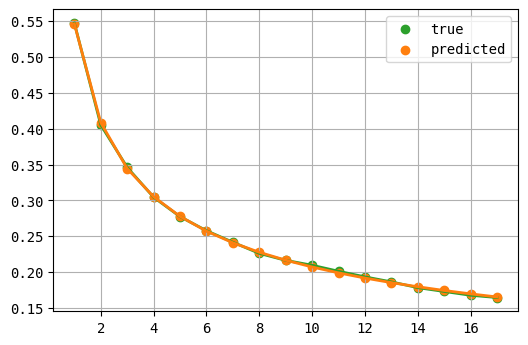

In [9]:
# computations for AA
y_predict_aa, fit_params_aa, x_aa, y_true_aa = fit_data_and_check(fn, "csv_files/Active_learning_results - AA_A_1k.csv")

aa_d = pd.read_csv("csv_files/Active_learning_results - AA_D_1k.csv")
aa_vals = (y_true_aa, aa_d.mean_vals, y_predict_aa, x_aa)

rmse : 1.196779571497855e-06,
r2 :
 [[1.         0.99946738]
 [0.99946738 1.        ]]


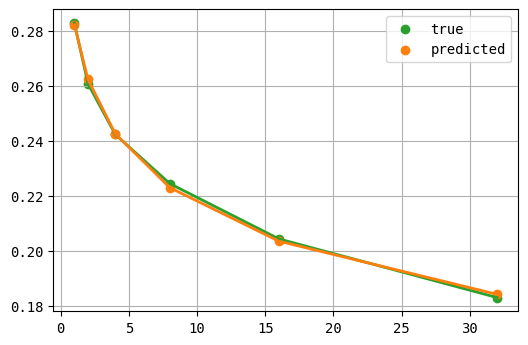

In [4]:
# Computations for QM9
y_predict_qm9, fit_params_qm9, x_qm9, y_true_qm9 = fit_data_and_check(fn, "csv_files/Active_learning_results - QM9_A_EXP.csv")

qm9_d = pd.read_csv("csv_files/Active_learning_results - QM9_D_EXP.csv")
qm9_vals = (y_true_qm9, qm9_d.mean_vals, y_predict_qm9, x_qm9)

rmse : 4.7724400737486274e-06,
r2 :
 [[1.         0.99414364]
 [0.99414364 1.        ]]


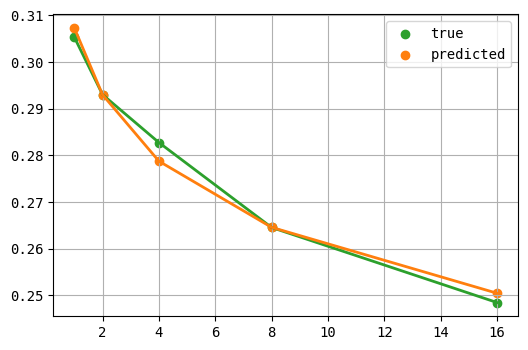

In [5]:
# Computations for OE
y_predict_oe, fit_params_oe, x_oe, y_true_oe = fit_data_and_check(fn, "csv_files/Active_learning_results - OE_A_EXP.csv")

oe_d = pd.read_csv("csv_files/Active_learning_results - OE_D_EXP.csv")
oe_vals = (y_true_oe, oe_d.mean_vals, y_predict_oe, x_oe)

# Plot predicted_a and true_a and true_d in same plot

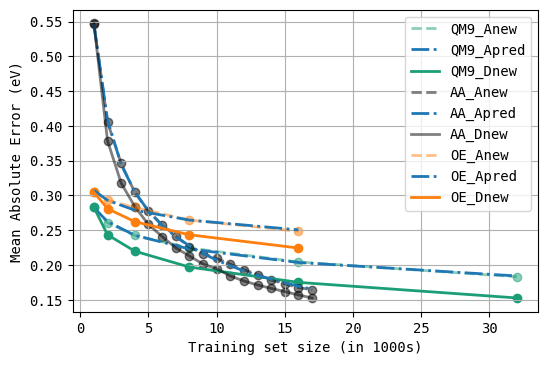

In [6]:
def plot(aa_vals, oe_vals, qm9_vals):
    aa_a_m_true, aa_d_m_true, aa_a_m_pred, aa_x = aa_vals
    oe_a_m_true, oe_d_m_true, oe_a_m_pred, oe_x = oe_vals
    qm9_a_m_true, qm9_d_m_true, qm9_a_m_pred, qm9_x = qm9_vals
    
    set_mpl_params_meeting(matplotlib)
    
    # ------------ QM9 -------------        
    plt.plot(qm9_x, qm9_a_m_true, "--" , color="#1b9e77", alpha=0.5, label="QM9_Anew")
    plt.plot(qm9_x, qm9_a_m_pred, "-." , color="tab:blue", alpha=1, label="QM9_Apred")
    plt.scatter(qm9_x, qm9_a_m_true, color="#1b9e77", alpha =0.5)
    
    plt.plot(qm9_x, qm9_d_m_true, color="#1b9e77", label="QM9_Dnew")
    plt.scatter(qm9_x, qm9_d_m_true, color="#1b9e77")
    
    # ------------ AA -------------
    plt.plot(aa_x, aa_a_m_true, "--" , color="k", alpha=0.5, label="AA_Anew")
    plt.plot(aa_x, aa_a_m_pred, "-." , color="tab:blue", alpha=1, label="AA_Apred")
    plt.scatter(aa_x, aa_a_m_true, color="k", alpha=0.5)
    
    plt.plot(aa_x, aa_d_m_true, color="k", alpha=0.5, label="AA_Dnew")
    plt.scatter(aa_x, aa_d_m_true, color="k", alpha=0.5)
    # ------------ OE -------------
    plt.plot(oe_x, oe_a_m_true, "--" , color="tab:orange", alpha=0.5, label="OE_Anew")
    plt.plot(oe_x, oe_a_m_pred, "-." , color="tab:blue", alpha=1, label="OE_Apred")
    plt.scatter(oe_x, oe_a_m_true, color="tab:orange", alpha=0.5)
    
    plt.plot(oe_x, oe_d_m_true, color="tab:orange", label="OE_Dnew")
    plt.scatter(oe_x, oe_d_m_true, color="tab:orange")
    
    #plt.xticks(batch_size)
    # plt.xscale("linear")
    plt.legend()
    plt.xlabel("Training set size (in 1000s)")
    plt.ylabel("Mean Absolute Error (eV)")
    plt.grid()

plot(aa_vals, oe_vals, qm9_vals)

0    -0.002321
1     0.396353
2     0.633023
3     0.741002
4     0.934893
5     0.990909
6     1.246644
7     1.354164
8     1.675432
9     1.586908
10    2.162132
11    2.468091
12    2.627002
13    2.729825
14    2.866896
15    3.174459
16    3.496952
dtype: float64
0     0.142504
1     1.585969
2     4.960759
3    14.629007
4    41.974509
dtype: float64
0    -0.022900
1     1.895504
2     4.964879
3    12.204731
4    28.614523
5    68.312237
dtype: float64


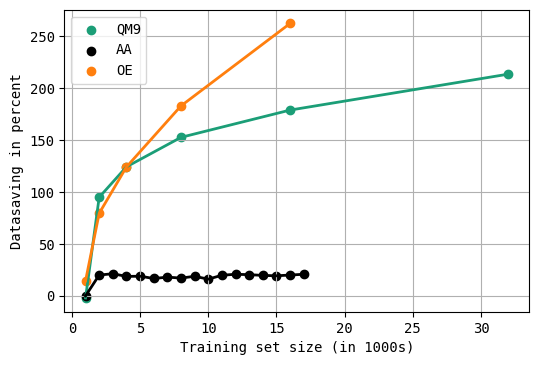

In [10]:
# aa_d_exp = pd.read_csv("csv_files/Active_learning_results - AA_D_EXP.csv")
# batch_size_aa = aa_d_exp.train_size//1000
# x_aa = batch_size_aa
# computations for AA

savings_aa = compute_datasavings(x_aa, aa_d.mean_vals, fn_inv, fit_params_aa)
savings_oe = compute_datasavings(x_oe, oe_d.mean_vals, fn_inv, fit_params_oe)
savings_qm9 = compute_datasavings(x_qm9, qm9_d.mean_vals, fn_inv, fit_params_qm9)

def plot_datasavings_qm9_aa_oe(batch_size_qm9,savings_qm9,batch_size_aa,savings_aa,batch_size_oe,savings_oe):
    set_mpl_params_meeting(matplotlib)
    
    batch_size_qm9 = batch_size_qm9
    savings_qm9 = savings_qm9
    plt.plot(batch_size_qm9, savings_qm9, color="#1b9e77")
    plt.scatter(batch_size_qm9, savings_qm9, color="#1b9e77", label="QM9")

    plt.plot(batch_size_aa, savings_aa, color="k")
    plt.scatter(batch_size_aa, savings_aa, color="k", label="AA")
    
    plt.plot(batch_size_oe, savings_oe, color="tab:orange")
    plt.scatter(batch_size_oe, savings_oe, color="tab:orange", label="OE")

    # plt.xscale("linear")
    plt.legend()
    #plt.xticks(batch_sizes)
    plt.xlabel("Training set size (in 1000s)")
    plt.ylabel("Datasaving in percent")
    plt.grid()
    plt.savefig("DataSavings_fitonlyfor_a.png")

plot_datasavings_qm9_aa_oe(x_qm9,savings_qm9,x_aa,savings_aa,x_oe,savings_oe)

rmse : 2.404978494730115e-06,
r2 :
 [[1.         0.99993127]
 [0.99993127 1.        ]]
0   -0.002884
1    0.364785
2    0.969149
3    2.506082
4    7.381099
dtype: float64
0     0.142504
1     1.585969
2     4.960759
3    14.629007
4    41.974509
dtype: float64
0    -0.022900
1     1.895504
2     4.964879
3    12.204731
4    28.614523
5    68.312237
dtype: float64


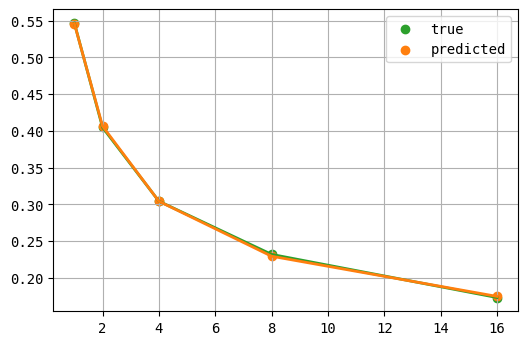

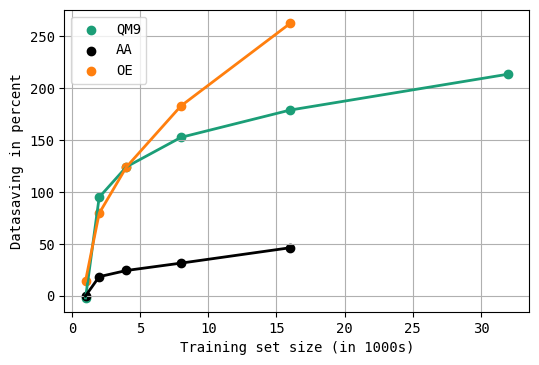

In [11]:
# aa_d_exp = pd.read_csv("csv_files/Active_learning_results - AA_D_EXP.csv")
# batch_size_aa = aa_d_exp.train_size//1000
# x_aa = batch_size_aa

y_predict_aa, fit_params_aa, x_aa, y_true_aa = fit_data_and_check(fn, "csv_files/Active_learning_results - AA_A_EXP.csv")
aa_d = pd.read_csv("csv_files/Active_learning_results - AA_D_EXP.csv")
aa_vals = (y_true_aa, aa_d.mean_vals, y_predict_aa, x_aa)

savings_aa = compute_datasavings(x_aa, aa_d.mean_vals, fn_inv, fit_params_aa)
savings_oe = compute_datasavings(x_oe, oe_d.mean_vals, fn_inv, fit_params_oe)
savings_qm9 = compute_datasavings(x_qm9, qm9_d.mean_vals, fn_inv, fit_params_qm9)

def plot_datasavings_qm9_aa_oe(batch_size_qm9,savings_qm9,batch_size_aa,savings_aa,batch_size_oe,savings_oe):
    set_mpl_params_meeting(matplotlib)
    
    batch_size_qm9 = batch_size_qm9
    savings_qm9 = savings_qm9
    plt.plot(batch_size_qm9, savings_qm9, color="#1b9e77")
    plt.scatter(batch_size_qm9, savings_qm9, color="#1b9e77", label="QM9")

    plt.plot(batch_size_aa, savings_aa, color="k")
    plt.scatter(batch_size_aa, savings_aa, color="k", label="AA")
    
    plt.plot(batch_size_oe, savings_oe, color="tab:orange")
    plt.scatter(batch_size_oe, savings_oe, color="tab:orange", label="OE")

    # plt.xscale("linear")
    plt.legend()
    #plt.xticks(batch_sizes)
    plt.xlabel("Training set size (in 1000s)")
    plt.ylabel("Datasaving in percent")
    plt.grid()
    plt.savefig("DataSavings_fitonlyfor_a.png")

plot_datasavings_qm9_aa_oe(x_qm9,savings_qm9,x_aa,savings_aa,x_oe,savings_oe)

# Check the data fit before
1. 200 percent data savings looks too good to be true, but it looks plausible looking at the data (plot A vs D)
2. Check how was the fit using the old fit function.
3. The fit for OE_A looks particularly bad, can I run a simple code which checks this again quickly ? GPyTorch, Strategy A
4. After strategy A has been implemented, Maybe Implement Strategy D as well just to double check that data savings are as good as they seem indeed.


rmse : 2.6386169043172883e-06,
r2 :
 [[1.         0.99992462]
 [0.99992462 1.        ]]


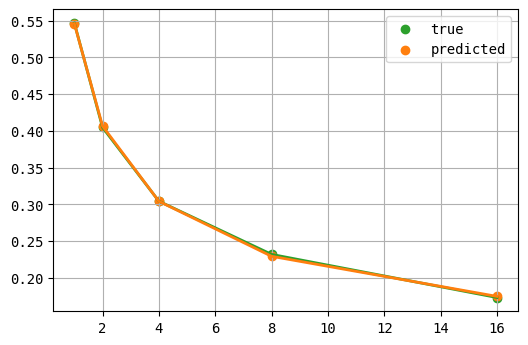

In [10]:
# change scipy curve fit to include 4th parameter
fn = lambda x,a,b,c,d: d + (a-d)/(1 + (x/c)**b)
y_predict_qm9, fit_params_qm9, x_qm9, y_true_qm9 = fit_data_and_check(fn, "csv_files/Active_learning_results - AA_A_EXP.csv")

Using the old approximating function, we get a similarly good fit. Seems that the fitting function sklearn `curve_fit` couldn't fit the data well. We will check that next.

[1.         1.         0.94163139 0.10491665]
rmse : 5.742249198452534e-05,
r2 :
 [[1.         0.99854415]
 [0.99854415 1.        ]]


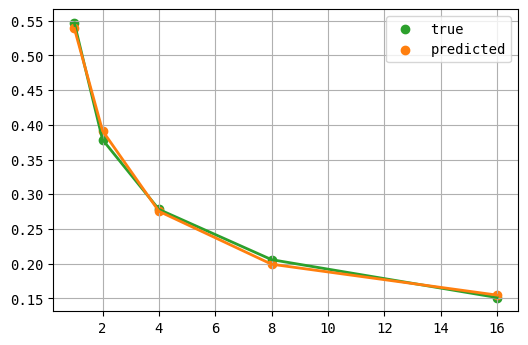

In [54]:
import numpy as np
from scipy.optimize import curve_fit

def get_fit_obj(fn, x, y):
    def fx(args):
        x = np.array(x)
        predict = fn(x, *args)
        true =  y
        error = np.mean((predict - true)**2)
        return error
    # params = minimize(fx, (0.7, 2, 0.55,0.5)).x
    params = curve_fit(fn, x, y, p0=[0.5, 0.5, 0.5, 0.5], bounds=(-1, [1., 1., 2, 2]), maxfev=1000)[0]
    return params

_fn = lambda x,a,b,c,d: d + (a-d)/(1 + (x/c)**b)

def fit_data_and_check(fn, path_to_csv):
    df = pd.read_csv(path_to_csv)
    x = df.train_size//1000
    y = df.mean_vals
    
    fit_params = get_fit_obj(fn, x, y)
    print(fit_params)
    y_pred = get_y(fn, fit_params, x)
    
    # compute errors for quantitative check
    rmse = compute_rmse(y_pred, y)
    r2   = np.corrcoef(y_pred, y)
    print(f"rmse : {rmse},\nr2 :\n {r2}")
    
    # plot the fit and true data for visual checks
    plot_fit_and_true(y_pred, y, x)
    
    return y_pred, fit_params, x, y

y_predict_qm9, fit_params_qm9, x_qm9, y_true_qm9 = fit_data_and_check(_fn, "csv_files/Active_learning_results - AA_D_EXP.csv")